# TP OpenMP - October 2022
## Part 1 : Pi
### Compilation

In [5]:
# specify number of threads
#!export OMP NUM THREADS=2 ; ./prog

In [20]:
print("Compilation process:")
print("    + critical")
!g++ -o bin/tp_openmp_part_1_pi_critical tp_openmp_part_1_pi_critical.cpp -fopenmp -O3 -march=native

print("    + atomic")
!g++ -o bin/tp_openmp_part_1_pi_atomic tp_openmp_part_1_pi_atomic.cpp -fopenmp -O3 -march=native

print("    + reduction")
!g++ -o bin/tp_openmp_part_1_pi_reduction tp_openmp_part_1_pi_reduction.cpp -fopenmp -O3 -march=native

print("    + nred")
!g++ -o bin/tp_openmp_part_1_pi_nred tp_openmp_part_1_pi_nred.cpp -fopenmp -O3 -march=native -Wall

Compilation process:
    + critical
    + atomic
    + reduction
    + nred


### Performance evaluation

In [13]:
# global vars
csv_result_file = "stats.csv"
csv_headers = {
    'version': str,
    'nb_threads': int,
    'num_steps' : int,
    'runtime' : float
}
color_num_steps = {
    100000 : "blue", 
    10000000 : "red", 
    1000000000 : "green",}
    #100000000000 : "black"}
#num_steps = list(color_num_steps.keys())[0:2]
num_steps = list(color_num_steps.keys())
print(num_steps)
nb_threads = [1, 2, 4, 8]
repeats = range(0,10)

[100000, 10000000, 1000000000]


In [14]:
import os
import subprocess

try:
    os.remove(csv_result_file)
except OSError:
    pass

# create csv file
f = open(csv_result_file, "w")
f.write(",".join(csv_headers.keys()) + "\n")
f.close()

# exec
for nsteps in num_steps:
    for nb_thread in nb_threads:
        for repeat in repeats:
            args = ("./bin/tp_openmp_part_1_pi_critical", "-T", str(nb_thread), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()
            
            args = ("./bin/tp_openmp_part_1_pi_atomic", "-T", str(nb_thread), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()

            args = ("./bin/tp_openmp_part_1_pi_reduction", "-T", str(nb_thread), "-N", str(nsteps))
            popen = subprocess.Popen(args, stdout=subprocess.PIPE)
            popen.wait()


### Performance analysis
#### Weak scaling

version  nb_threads  num_steps   runtime
0   critical           1     100000  0.001823
1     atomic           1     100000  0.000622
2  reduction           1     100000  0.000126
3   critical           1     100000  0.000981
4     atomic           1     100000  0.000479
5  reduction           1     100000  0.000131
6   critical           1     100000  0.000978
7     atomic           1     100000  0.000482
8  reduction           1     100000  0.000125
9   critical           1     100000  0.000979

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


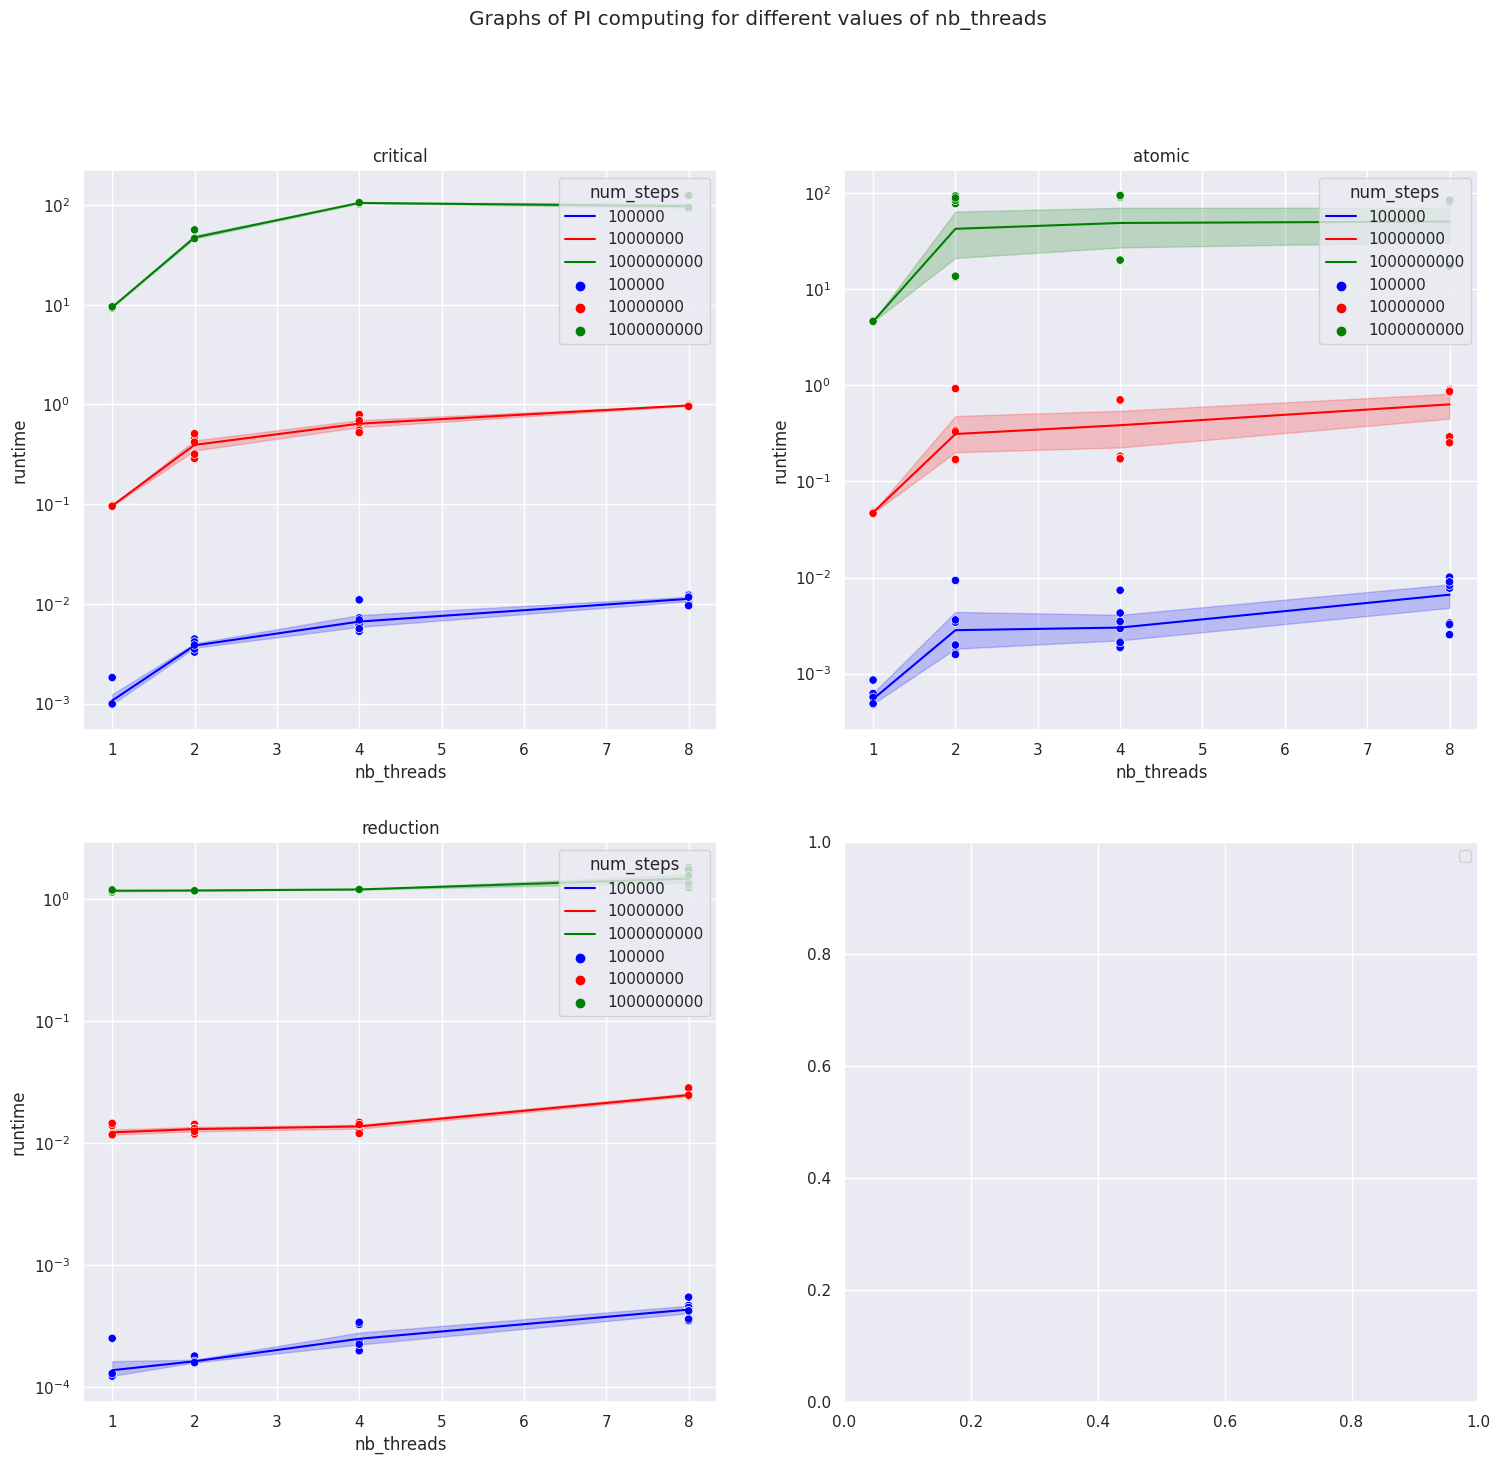

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from numpy import genfromtxt
import itertools
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()


df = pd.read_csv(
    csv_result_file,
    header=0, # line number of header
    dtype=csv_headers
)
display(df.head(10))

# display graphs
fig, axes = plt.subplots(2, 2, figsize=(18,16))
fig.suptitle("Graphs of PI computing for different values of nb_threads")

unique_nb_steps = df['num_steps'].unique()
unique_nb_steps.sort()
nb_different_num_steps = len(unique_nb_steps)
# for i in range(nb_different_num_steps):
#     current_num_steps = int(unique_nb_steps[i])
#     df_plot = df[(df['num_steps'] == current_num_steps)]
#     mean_stats = df.groupby(['num_steps','version','nb_threads']).mean().reset_index()

#     # first graph: critical
#     graph_version = "critical"
#     df_plot_0 = df_plot[df_plot['version'] == "critical"]

#     axes[0][0].plot(
#         mean_stats['nb_threads'], 
#         mean_stats['runtime'],
#         linestyle="solid",
#         color=color_num_steps[current_num_steps],
#         marker='x',
#     )
#     axes[0][0].set(
#         yscale="log",
#         xlabel="nb_threads",
#         ylabel="time (s)",
#         title=graph_version
#     )
#     axes[0][0].scatter(
#         df_plot_0['nb_threads'], 
#         df_plot_0['runtime'],
#         color=color_num_steps[current_num_steps]
#     )

# graph plotting using seaborn
# first graph: critical
graph_version = "critical"
df_plot_0 = df[df['version'] == graph_version]

g0 = sns.lineplot(
    ax=axes[0][0],
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g0.set(title=graph_version)
g0.set(yscale="log")
g00 = sns.scatterplot(
    ax=axes[0][0],
    data=df_plot_0, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g00.set(yscale="log")

# second graph: atomic
graph_version = "atomic"
df_plot_1 = df[df['version'] == graph_version]

g1 = sns.lineplot(
    ax=axes[0][1],
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g1.set(title=graph_version)
g1.set(yscale="log")
g11 = sns.scatterplot(
    ax=axes[0][1],
    data=df_plot_1, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g11.set(yscale="log")

# third graph: reduction
graph_version = "reduction"
df_plot_2 = df[df['version'] == graph_version]

g2 = sns.lineplot(
    ax=axes[1][0],
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g2.set(title=graph_version)
g2.set(yscale="log")
g22 = sns.scatterplot(
    ax=axes[1][0],
    data=df_plot_2, 
    x="nb_threads",
    y="runtime", 
    hue="num_steps",
    palette=color_num_steps,
)
g22.set(yscale="log")


plt.legend()
plt.show()

#### Strong Scaling

### Discussion